# Day 23

### Face Detection

In [1]:
import cv2 as cv
import numpy as np
import requests
from PIL import Image
import io
import matplotlib.pyplot as plt

In [31]:
img_url = "https://img4.goodfon.com/wallpaper/nbig/8/45/mr-robot-elliot-alderson-rami-malek.jpg"
image=Image.open(io.BytesIO(requests.get(img_url, stream=True).content)).convert('RGB')
image = np.array(image)
image

array([[[ 75,  99, 103],
        [ 75,  99, 103],
        [ 75,  99, 103],
        ...,
        [ 88, 112, 114],
        [ 88, 112, 114],
        [ 88, 112, 114]],

       [[ 75,  99, 103],
        [ 75,  99, 103],
        [ 75,  99, 103],
        ...,
        [ 88, 112, 114],
        [ 88, 112, 114],
        [ 88, 112, 114]],

       [[ 75,  99, 103],
        [ 75,  99, 103],
        [ 75,  99, 103],
        ...,
        [ 89, 113, 115],
        [ 89, 113, 115],
        [ 89, 113, 115]],

       ...,

       [[123, 149, 140],
        [123, 149, 140],
        [124, 150, 141],
        ...,
        [133, 159, 150],
        [133, 159, 150],
        [133, 159, 150]],

       [[123, 149, 140],
        [123, 149, 140],
        [123, 149, 140],
        ...,
        [133, 159, 150],
        [133, 159, 150],
        [133, 159, 150]],

       [[123, 149, 140],
        [123, 149, 140],
        [123, 149, 140],
        ...,
        [133, 159, 150],
        [133, 159, 150],
        [133, 159, 150]]

In [16]:
face_detector = cv.CascadeClassifier("./XML/haarcascade_frontalface_default.xml")
eye_detector = cv.CascadeClassifier("./XML/eye.xml")
smile_detector = cv.CascadeClassifier("./XML/smile.xml")

In [32]:
faces = face_detector.detectMultiScale(image, 1.3, 5)
faces

array([[447, 181, 394, 394]], dtype=int32)

In [5]:
eyes = eye_detector.detectMultiScale(image, 1.3, 5)
eyes

array([[666, 283,  97,  97],
       [515, 287,  97,  97]], dtype=int32)

In [41]:
smiles = smile_detector.detectMultiScale(image, 1.3, 50)
smiles

array([[558, 466, 164,  82]], dtype=int32)

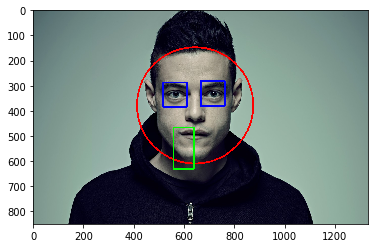

In [42]:
for face in faces:
    x, y, h, w = face
    cv.circle(image, (x+w//2, y+h//2), int(h/1.7), (255, 0, 0), 5)

for eye in eyes:
    x, y, h, w = eye
    cv.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 5)
    
for smile in smiles:
    x, y, h, w = smile
    cv.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 5)

plt.imshow(image)

In [45]:
def detect_face(frame):
    faces = face_detector.detectMultiScale(frame, 1.3, 5)
    eyes = eye_detector.detectMultiScale(frame, 1.3, 5)
    smiles = smile_detector.detectMultiScale(frame, 1.3, 20)
    if len(faces):
        for face in faces:
            x, y, h, w = face
            cv.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)

    if len(eyes):
        for eye in eyes:
            print(eye, end="\r")
            x, y, h, w = eye
            cv.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 1)
            
    if len(smiles):  
        for smile in smiles:
            x, y, h, w = smile
            cv.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 1)

            
    return frame
    
cap = cv.VideoCapture(0)
while True:
    ret, frame = cap.read()
    c =  cv.waitKey(1)
    if c==27:
        break
    kernel_sharpen_1 = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
    cv.imshow("Cam 1", detect_face(frame))
cap.release()
cv.destroyAllWindows()